In [25]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install statsmodels


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

# Code for File Path
file_path = r"D:\Data Analyst\Notes, Example\Excel For Phyton\Global Superstore.xlsx"

# Code for Loading the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Print the first few rows of the dataset
print(df.head())

# Code for summary statistics
print("\nSummary statistics:")
print(df.describe())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [37]:

# Question - Handle missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

# Convert data types if necessary
# not needed

# Create any new columns needed for analysis
# so far not needed


Missing values in each column:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Summary statistics for 'Sales':
count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64


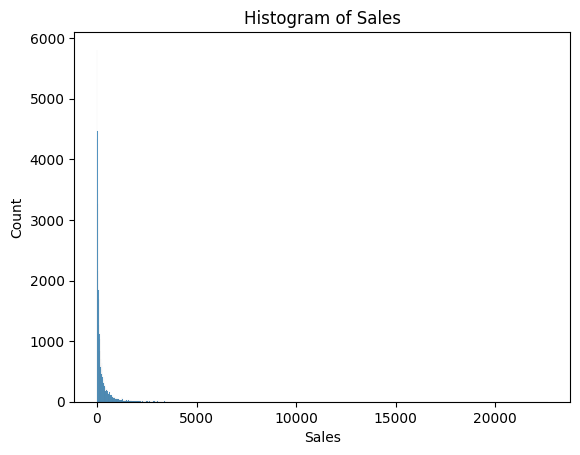

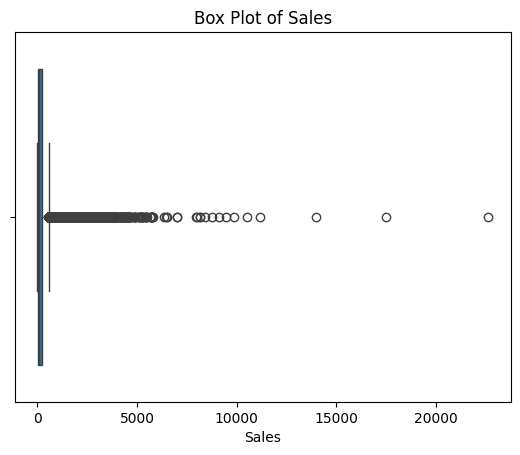

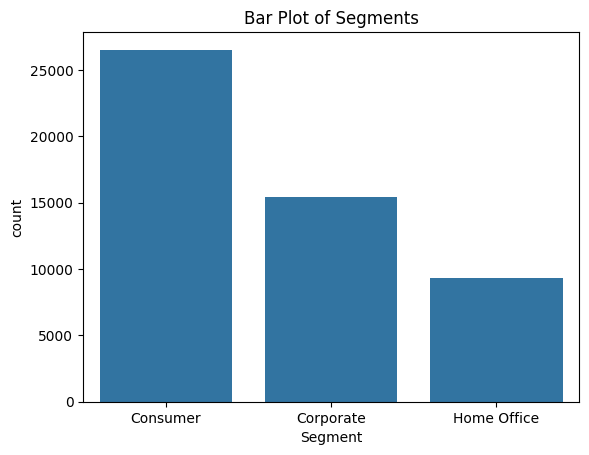

In [41]:

# Univariate analysis

print("Summary statistics for 'Sales':")
print(df['Sales'].describe())

# Type 1- Histogram for 'Sales'
sns.histplot(df['Sales'], kde=False)
plt.title('Histogram of Sales')
plt.show()

# Type 2- Box plot for 'Sales'
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.show()

# Type 3 -Bar plot for 'Segment'
sns.countplot(x=df['Segment'])
plt.title('Bar Plot of Segments')
plt.show()


# Bivariate analysis



In [ ]:

# Summary statistics for key variables

# Grouped statistics



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [51]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions

region1 = 'Africa'
region2 = 'North'

# 1- Filter data for the selected regions
sales_region1 = df[df['Region'] == region1]['Sales']
sales_region2 = df[df['Region'] == region2]['Sales']

# 2- Perform the T-test
t_stat, p_value = ttest_ind(sales_region1, sales_region2, nan_policy='omit')

print(f"\nT-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# 3- Interpret the results
if p_value < 0.05:
    print("The difference in sales between the two regions is statistically significant.")
else:
    print("The difference in sales between the two regions is not statistically significant.")


# Example: Chi-square test for independence between Ship Mode and Customer Segment



T-test Results:
T-statistic: -10.624308700705102
P-value: 3.237608674852224e-26
The difference in sales between the two regions is statistically significant.


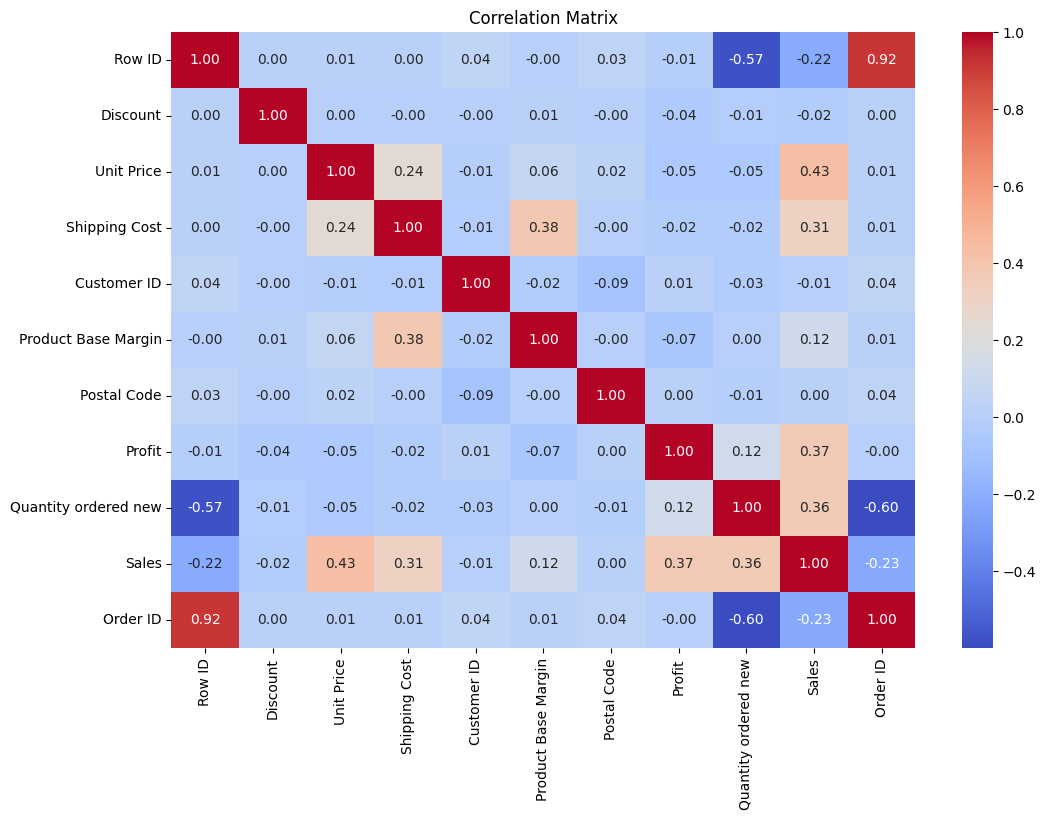

In [ ]:
# Selecting only numeric columns for correlation matrix








0


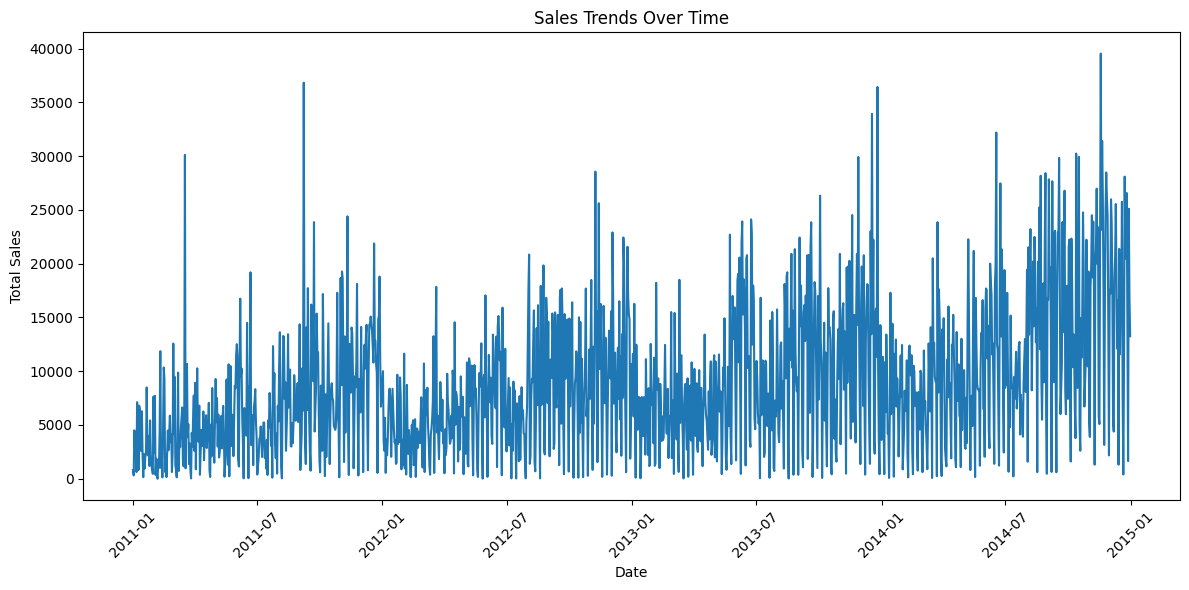

C:\Users\01\AppData\Local\Temp\ipykernel_23276\1900722873.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend_monthly = df.resample('M', on='Order Date')['Sales'].sum().reset_index()


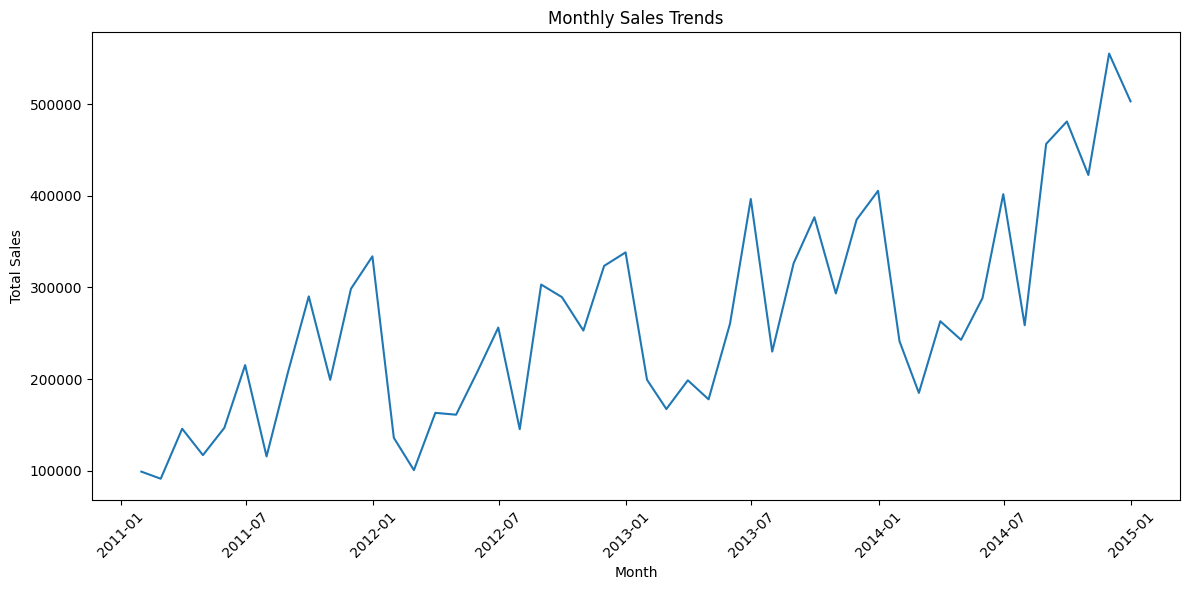

In [53]:

# Plotting sales trends over time

# making that 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Any missing values in 'Order Date'
print(df['Order Date'].isnull().sum())

# Aggregate sales data by date
sales_trend = df.groupby('Order Date')['Sales'].sum().reset_index()

# Plot the sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resample sales data by month
# Answer as below
sales_trend_monthly = df.resample('M', on='Order Date')['Sales'].sum().reset_index()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=sales_trend_monthly)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






0


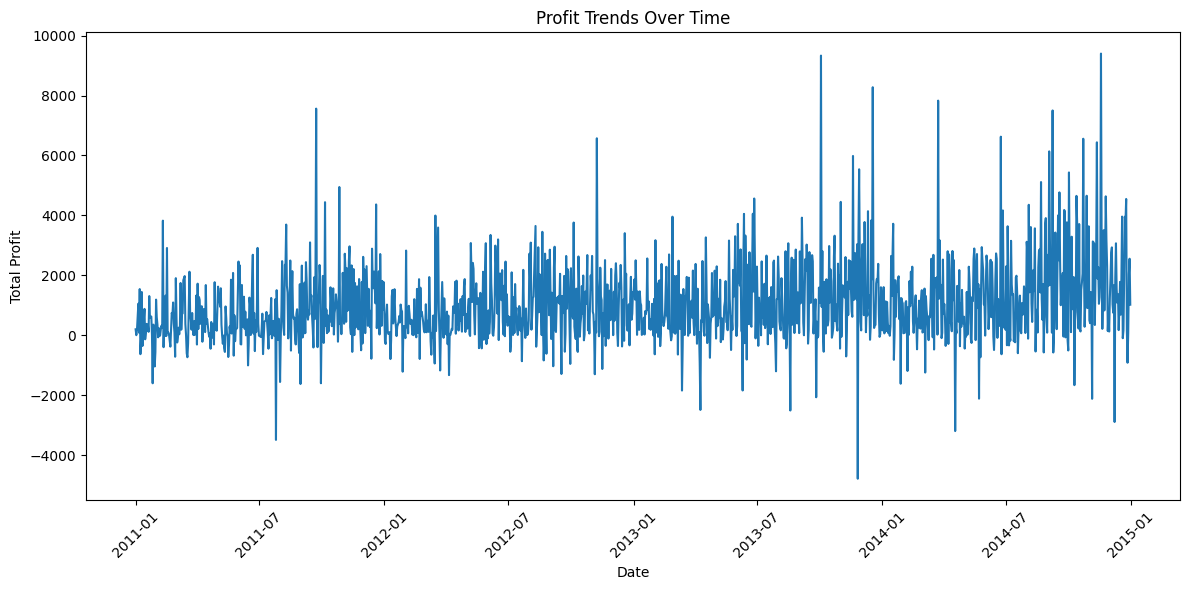

In [54]:

# Plotting profit trends over time
# Answer as below
# Ensure that 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Check for any missing values in 'Order Date'
print(df['Order Date'].isnull().sum())

# Aggregate profit data by date
profit_trend = df.groupby('Order Date')['Profit'].sum().reset_index()

# Plot the profit trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Profit', data=profit_trend)
plt.title('Profit Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Top Product Categories by Total Sales:
          Category         Sales        Profit
2       Technology  4.744557e+06  663778.73318
0        Furniture  4.110874e+06  285204.72380
1  Office Supplies  3.787070e+06  518473.83430

Top Product Categories by Total Profit:
          Category         Sales        Profit
2       Technology  4.744557e+06  663778.73318
1  Office Supplies  3.787070e+06  518473.83430
0        Furniture  4.110874e+06  285204.72380


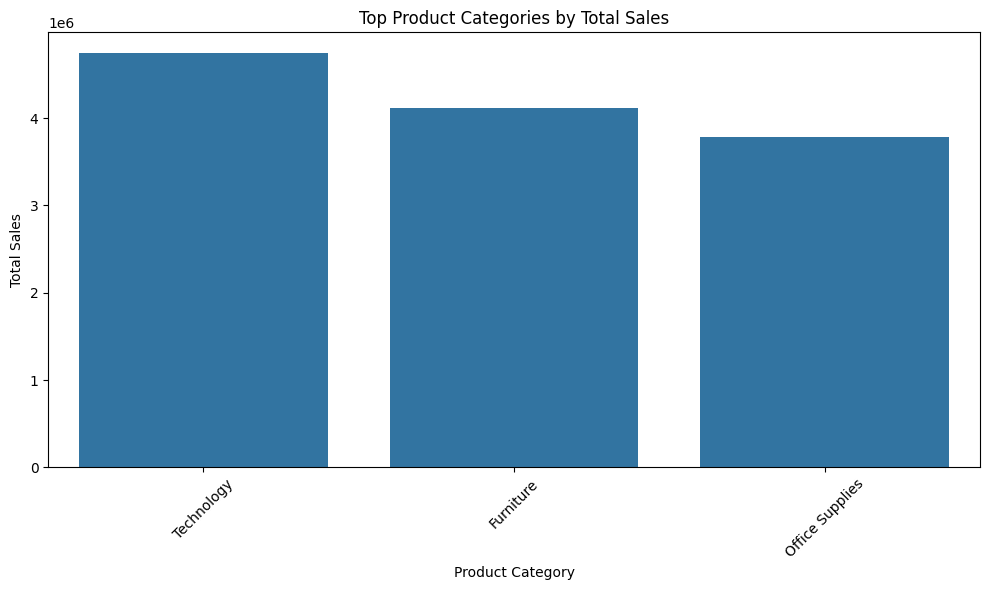

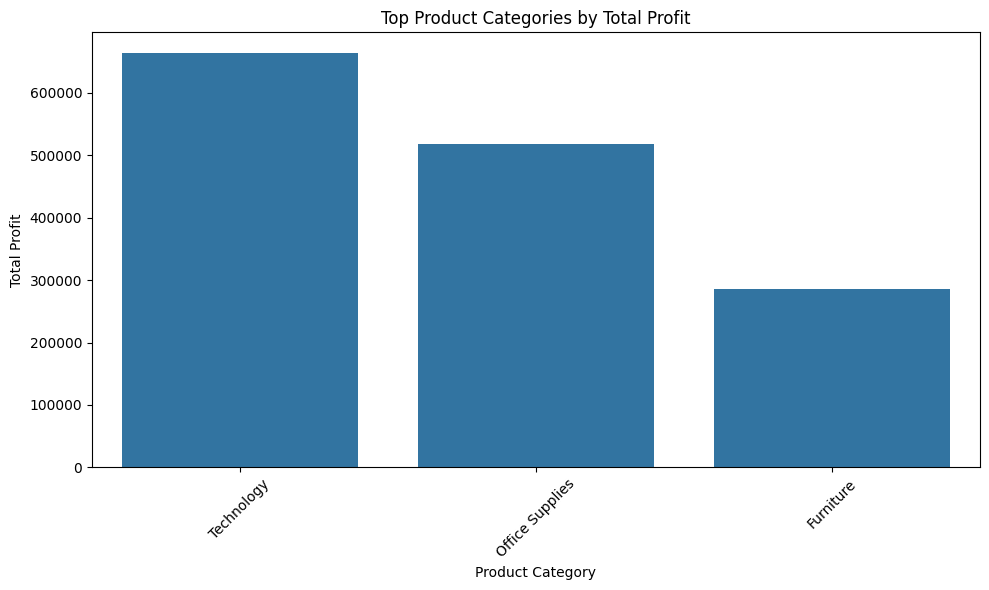

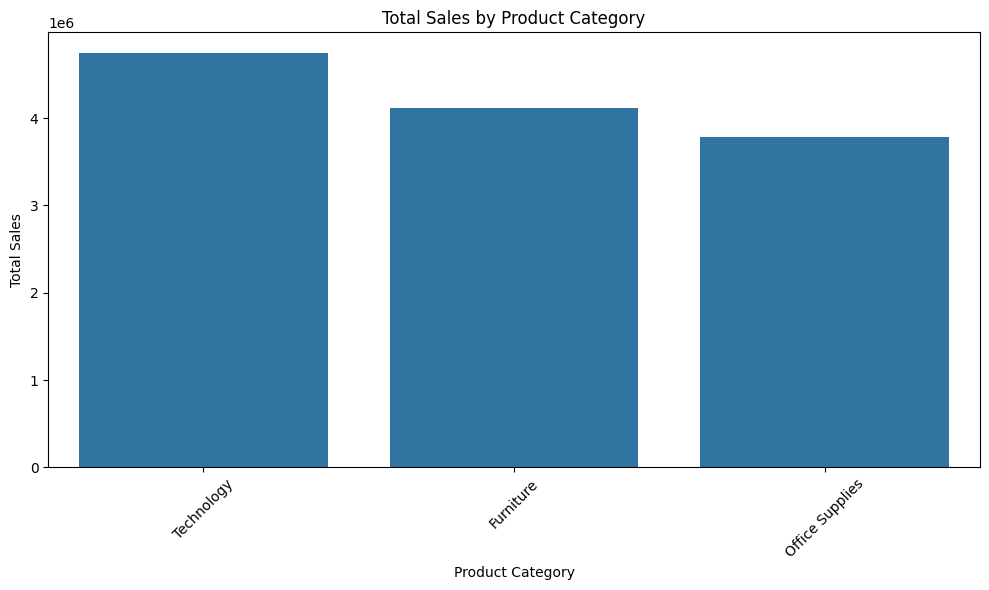

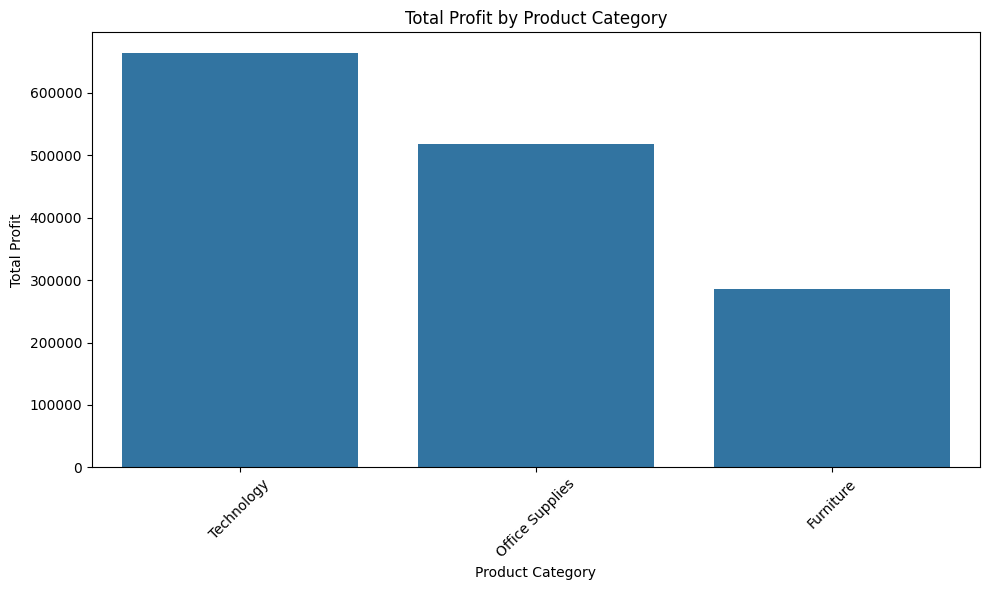

In [59]:

# Identifying top-performing product categories based on total sales and profit

# Answer as below 
# Group by 'Category' and calculate total sales and profit for each category
category_performance = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Sort by total sales and total profit
top_categories_by_sales = category_performance.sort_values(by='Sales', ascending=False)
top_categories_by_profit = category_performance.sort_values(by='Profit', ascending=False)

# Print the top categories by sales
print("\nTop Product Categories by Total Sales:")
print(top_categories_by_sales)

# Print the top categories by profit
print("\nTop Product Categories by Total Profit:")
print(top_categories_by_profit)

# Plotting top categories by total sales (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=top_categories_by_sales)
plt.title('Top Product Categories by Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Plotting top categories by total profit (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=top_categories_by_profit)
plt.title('Top Product Categories by Total Profit')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


# Plotting total sales by product category
# Answer as below
# Group by 'Category' and calculate total sales for each category
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort the categories by total sales in descending order
category_sales = category_sales.sort_values(by='Sales', ascending=False)

# Plotting total sales by product category (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

# Plotting total profit by product category
# Answer as below
# Group by 'Category' and calculate total profit for each category
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Sort the categories by total profit in descending order
category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Plotting total profit by product category (Vertical Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


In [62]:

# Generating summary statistics for each region
# Grouping by 'Region' and generating summary statistics for each region
region_summary = df.groupby('Region').describe()

# Print the summary statistics for each region
print("\nSummary Statistics for Each Region:")
print(region_summary)


# Display summary statistics
# Generate summary statistics for the entire dataset
summary_stats = df.describe()

# Print the summary statistics
print("\nSummary Statistics for the Entire Dataset:")
print(summary_stats)



Summary Statistics for Each Region:
                 Row ID                                                      \
                  count          mean      min       25%      50%       75%   
Region                                                                        
Africa           4587.0  46223.183344  41291.0  43645.50  46222.0  48753.00   
Canada            384.0  46487.111979  41385.0  43929.00  46599.0  49042.50   
Caribbean        1690.0   4878.833728     38.0   2543.25   4736.0   7352.75   
Central         11117.0  16952.509940     12.0   9334.00  14729.0  19471.00   
Central Asia     2048.0  25442.157227  20300.0  23126.75  25506.5  27945.25   
EMEA             5029.0  46336.887453  41296.0  43914.00  46318.0  48815.00   
East             2848.0  36237.685042  31320.0  33593.75  36243.0  38809.25   
North            4785.0   9687.855799      1.0   4767.00   9135.0  14731.00   
North Asia       2338.0  25182.025235  20295.0  22574.50  25198.5  27685.75   
Oceania        

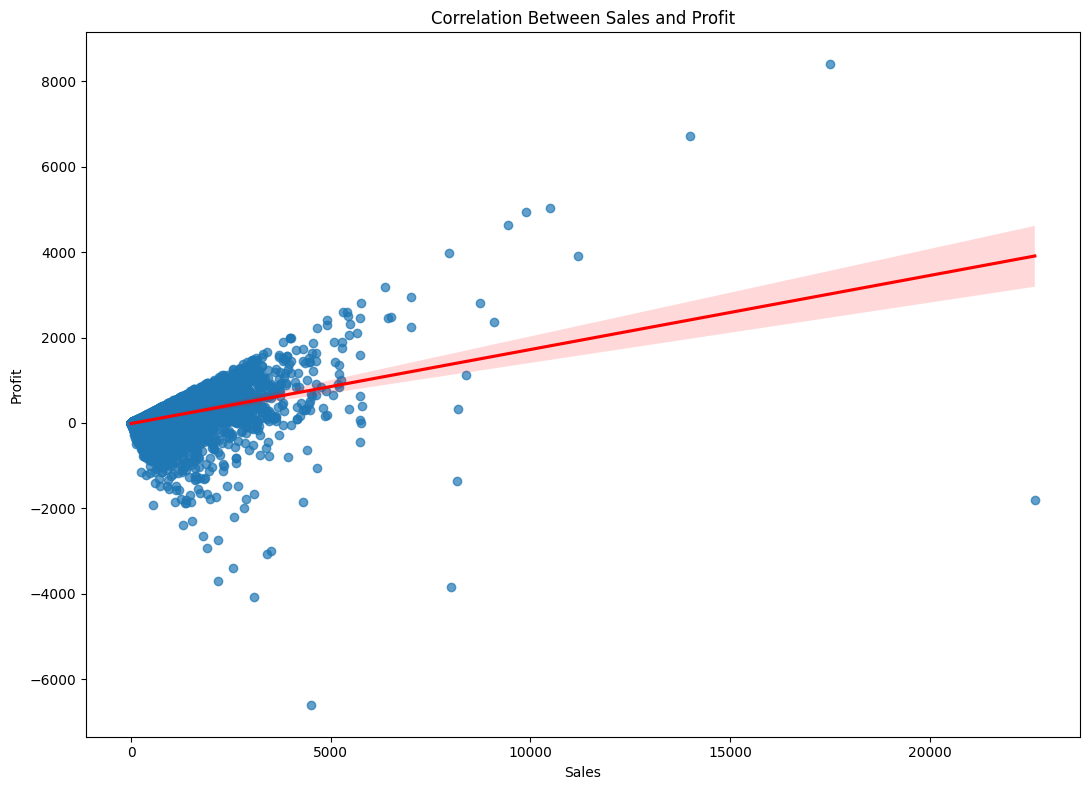


Correlation Coefficient between Sales and Profit: 0.48

Correlation Coefficient between Sales and Profit: 0.48


In [66]:

# Visualizing the correlation between sales and profit

# Scatter plot with regression line to visualize the correlation between Sales and Profit
plt.figure(figsize=(11, 8))
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

# Adding a title and labels
plt.title('Correlation Between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')

# Display the plot
plt.tight_layout()
plt.show()

# Calculating the correlation coefficient
correlation_coefficient = df['Sales'].corr(df['Profit'])
print(f"\nCorrelation Coefficient between Sales and Profit: {correlation_coefficient:.2f}")





# Displaying the correlation coefficient

# Calculating the correlation coefficient between Sales and Profit
correlation_coefficient = df['Sales'].corr(df['Profit'])

# Display the correlation coefficient
print(f"\nCorrelation Coefficient between Sales and Profit: {correlation_coefficient:.2f}")




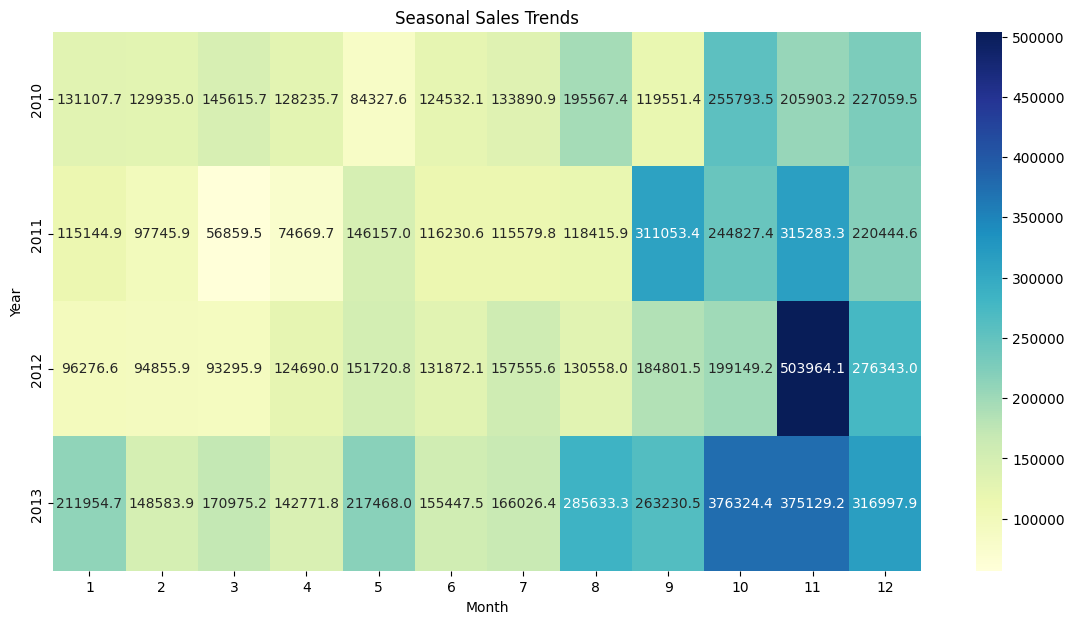

In [ ]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









<ipython-input-14-586251ecf454>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_ship_mode.index, y=sales_by_ship_mode.values, palette='magma')


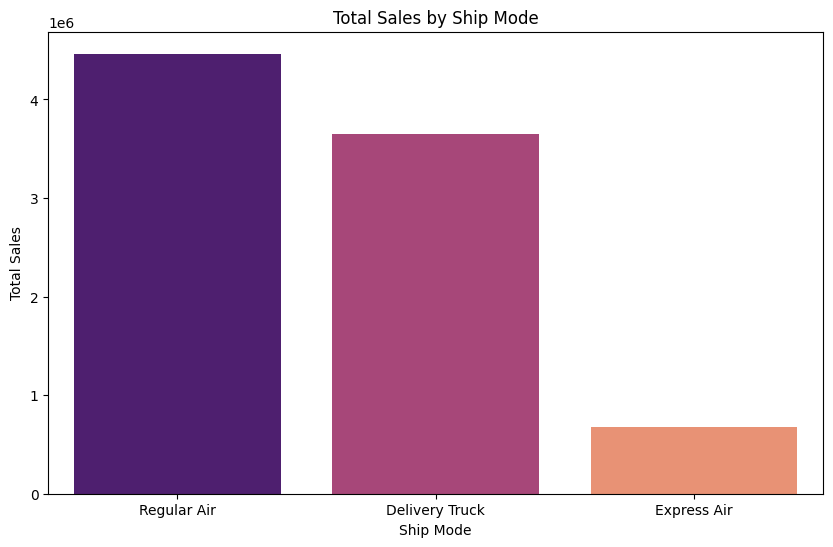

,Sales
Ship Mode,
Regular Air,4464427.51
Delivery Truck,3650525.84
Express Air,674603.99


In [ ]:

# Comparing sales across different ship modes




sales_by_ship_mode


Column Names: Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Ship Date', 'Profit', 'Quantity ordered new',
       'Sales', 'Order ID', 'Order Month', 'Order Year'],
      dtype='object')


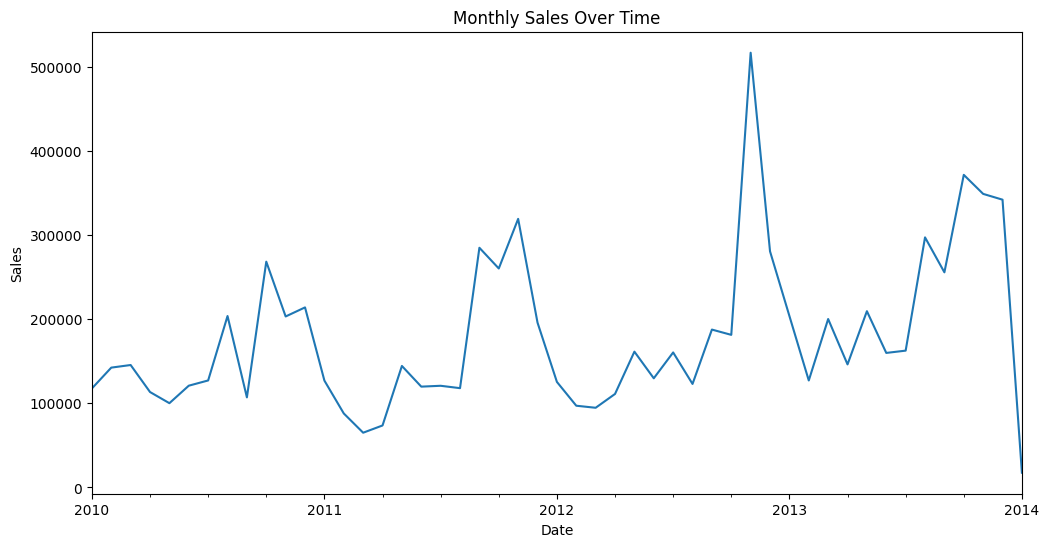

In [ ]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month









